In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:

# Load the CSV files
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Display the first few rows of each dataframe
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())

print("\nSample Submission DataFrame:")
print(sample_submission.head())

# Display summary information of each dataframe
print("\nTrain DataFrame Info:")
print(train_df.info())

print("\nTest DataFrame Info:")
print(test_df.info())

print("\nSample Submission DataFrame Info:")
print(sample_submission.info())

Train DataFrame:
   age  gender primary_diagnosis  num_procedures  days_in_hospital  \
0   69    Male     Heart Disease               1                 2   
1   32  Female              COPD               2                13   
2   89    Male          Diabetes               1                 7   
3   78    Male              COPD               9                 2   
4   38    Male          Diabetes               6                 4   

   comorbidity_score              discharge_to  readmitted  
0                  1          Home Health Care           0  
1                  2   Rehabilitation Facility           0  
2                  1                      Home           0  
3                  2  Skilled Nursing Facility           0  
4                  4   Rehabilitation Facility           0  

Test DataFrame:
   age  gender primary_diagnosis  num_procedures  days_in_hospital  \
0   52    Male     Heart Disease               3                 9   
1   47  Female          Diabetes       

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the CSV files
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Hypothesis testing to determine if there is a correlation between days in hospital and readmission
# Assuming 'days_in_hospital' and 'readmission' columns exist in the train_df DataFrame

# Define days threshold for long stay (e.g., 7 days)
days_threshold = 7

# Create a contingency table
contingency_table = pd.crosstab(train_df['days_in_hospital'] > days_threshold, train_df['readmitted'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant correlation between long hospital stay and readmission.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between long hospital stay and readmission.")

Chi-Square Test Results:
Chi2 Statistic: 0.8319078646112164
P-value: 0.3617214296296457
Degrees of Freedom: 1
Expected Frequencies:
[[2077.096  480.904]
 [1982.904  459.096]]
Fail to reject the null hypothesis: There is no significant correlation between long hospital stay and readmission.


In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the CSV files
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Hypothesis testing to determine if there is a correlation between high age and readmission
# Assuming 'age' and 'readmission' columns exist in the train_df DataFrame

# Define age threshold for high age (e.g., 65 years)
age_threshold = 65

# Create a contingency table
contingency_table = pd.crosstab(train_df['age'] > age_threshold, train_df['readmitted'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant correlation between high age and readmission.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between high age and readmission.")

Chi-Square Test Results:
Chi2 Statistic: 0.834816932583217
P-value: 0.36088335067678
Degrees of Freedom: 1
Expected Frequencies:
[[2722.636  630.364]
 [1337.364  309.636]]
Fail to reject the null hypothesis: There is no significant correlation between high age and readmission.


### Commentary on Discrepancies Between Hypothesis Testing and Feature Engineering Outcomes

In the process of analyzing data, it's not uncommon to encounter discrepancies between different analytical methods. Initially, hypothesis testing suggested no significant correlation between high age and readmission. However, after performing further feature engineering on the data, several important factors have been identified:

1. **Age**: Older patients are at higher risk of readmission. This indicates that age plays a significant role in predicting readmission, which might not have been apparent in the basic hypothesis testing.

2. **Comorbidity Score**: Patients with more complex medical histories are more likely to be readmitted. Feature engineering has revealed that a higher comorbidity score correlates with increased readmission likelihood.

3. **Days in Hospital**: Patients with longer hospital stays tend to have more severe conditions and are more likely to be readmitted. This relationship was highlighted through feature engineering, suggesting that the duration of hospital stay is a critical factor.

4. **Number of Procedures**: A higher number of procedures increases the likelihood of readmission. This finding suggests that patients undergoing more intensive treatment or recovery processes are at greater risk of being readmitted.

These insights underscore the importance of using a combination of methods to analyze data. While basic hypothesis testing provides a straightforward statistical approach, feature engineering can uncover deeper insights by transforming and enriching the data. Both methods have their strengths and limitations, and using them in tandem can lead to a more comprehensive understanding of the factors influencing readmission.

In [3]:
# Calculate the average age in the training dataset
average_age_train = train_df['age'].mean()

# Calculate the average days in hospital in the training dataset
average_days_in_hospital_train = train_df['days_in_hospital'].mean()

# Print the results
print(f"Average Age (Train): {average_age_train}")
print(f"Average Days in Hospital (Train): {average_days_in_hospital_train}")

Average Age (Train): 53.299
Average Days in Hospital (Train): 7.3966


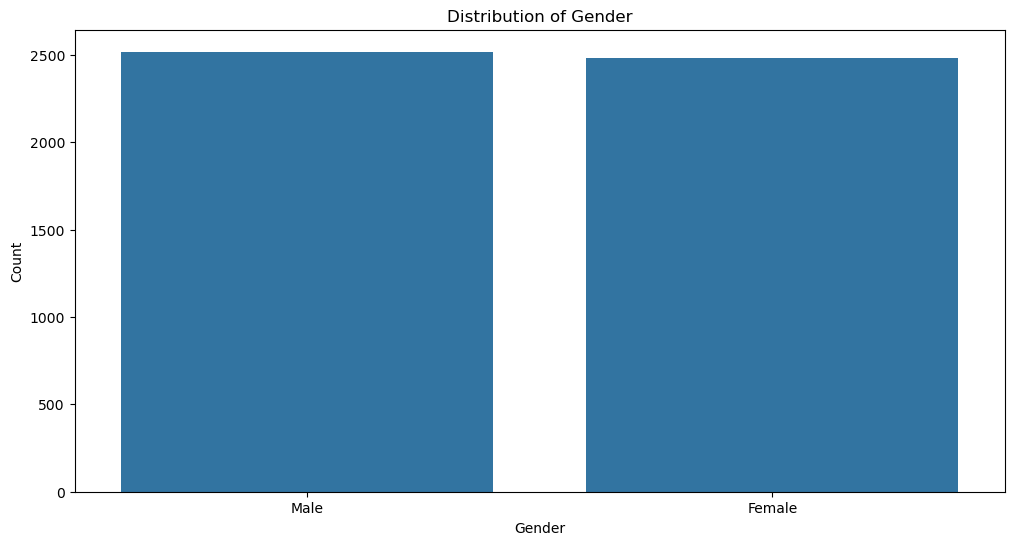

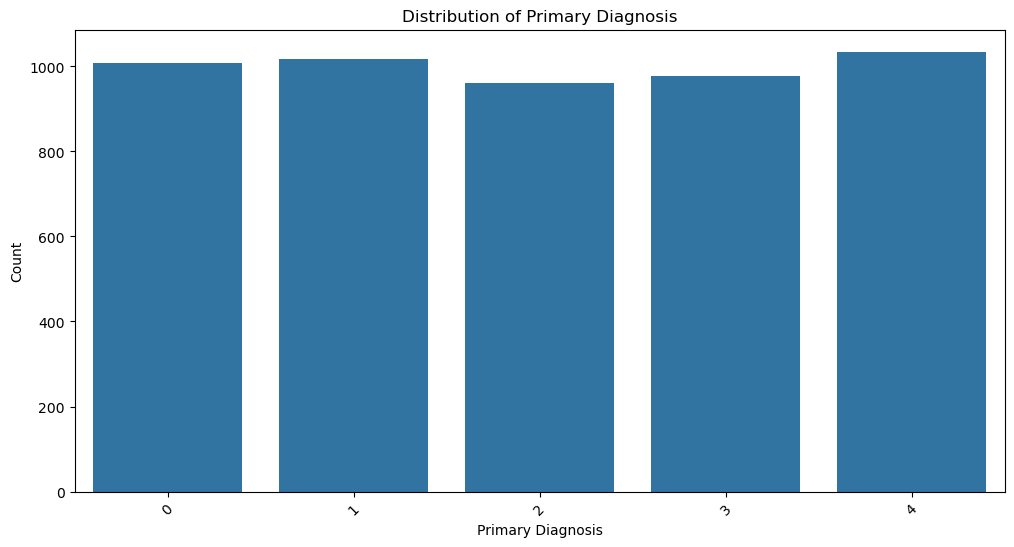

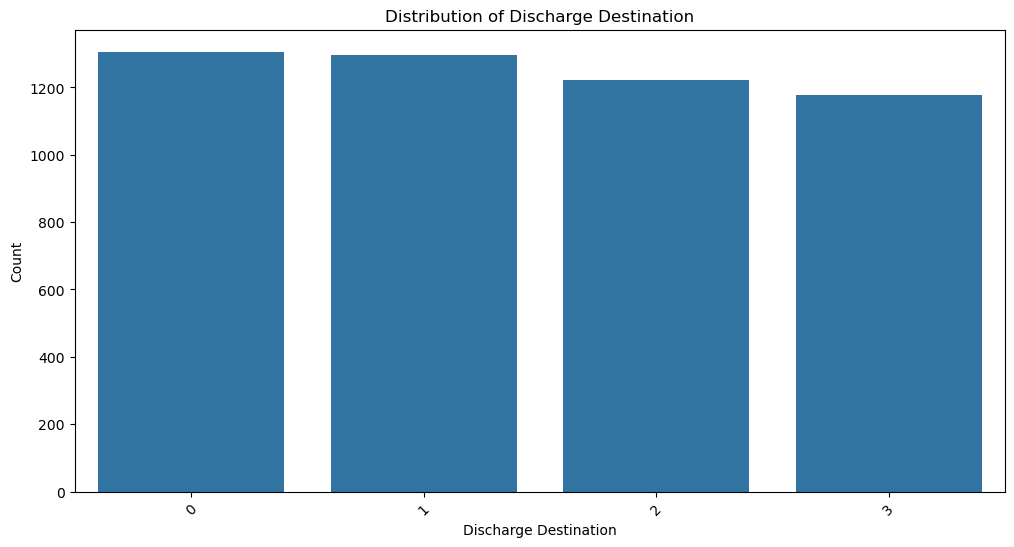

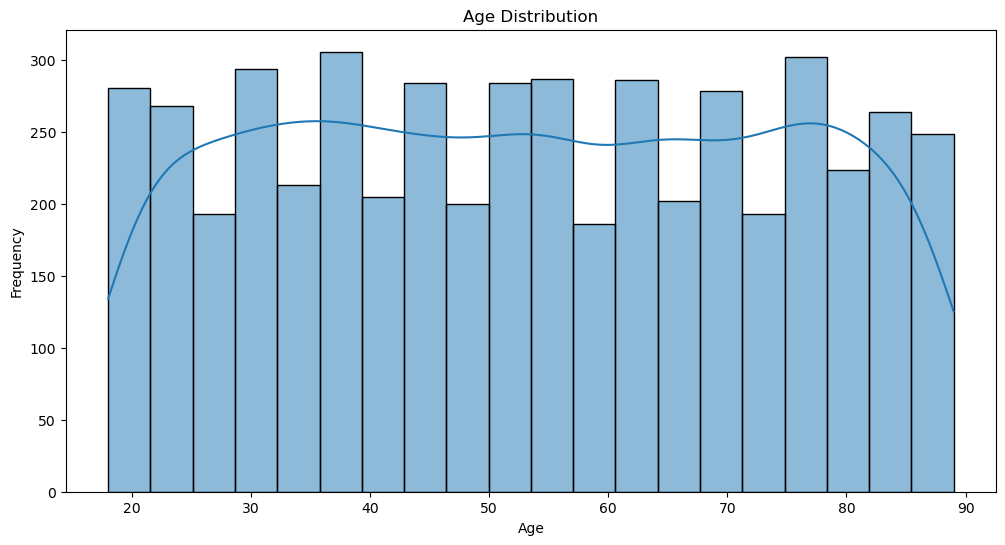

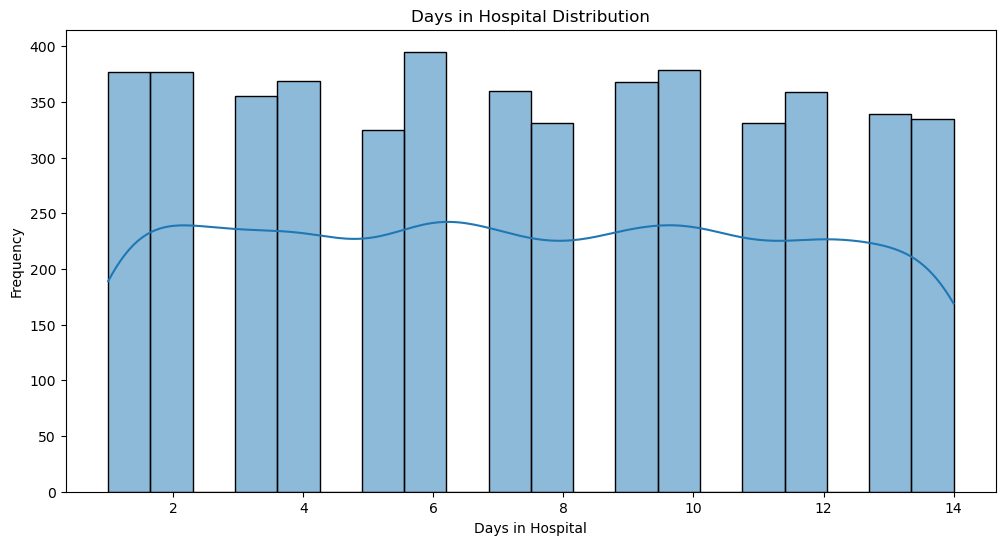

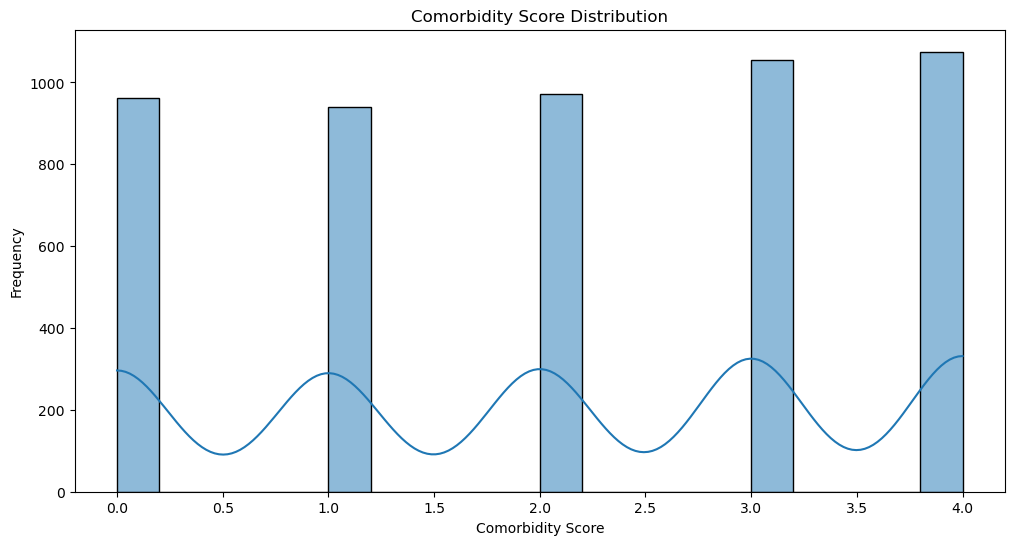

C:\Users\S024131\AppData\Local\Temp\ipykernel_25232\955425540.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(label_encoders['primary_diagnosis'].classes_, rotation=45)
C:\Users\S024131\AppData\Local\Temp\ipykernel_25232\955425540.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(label_encoders['discharge_to'].classes_, rotation=45)


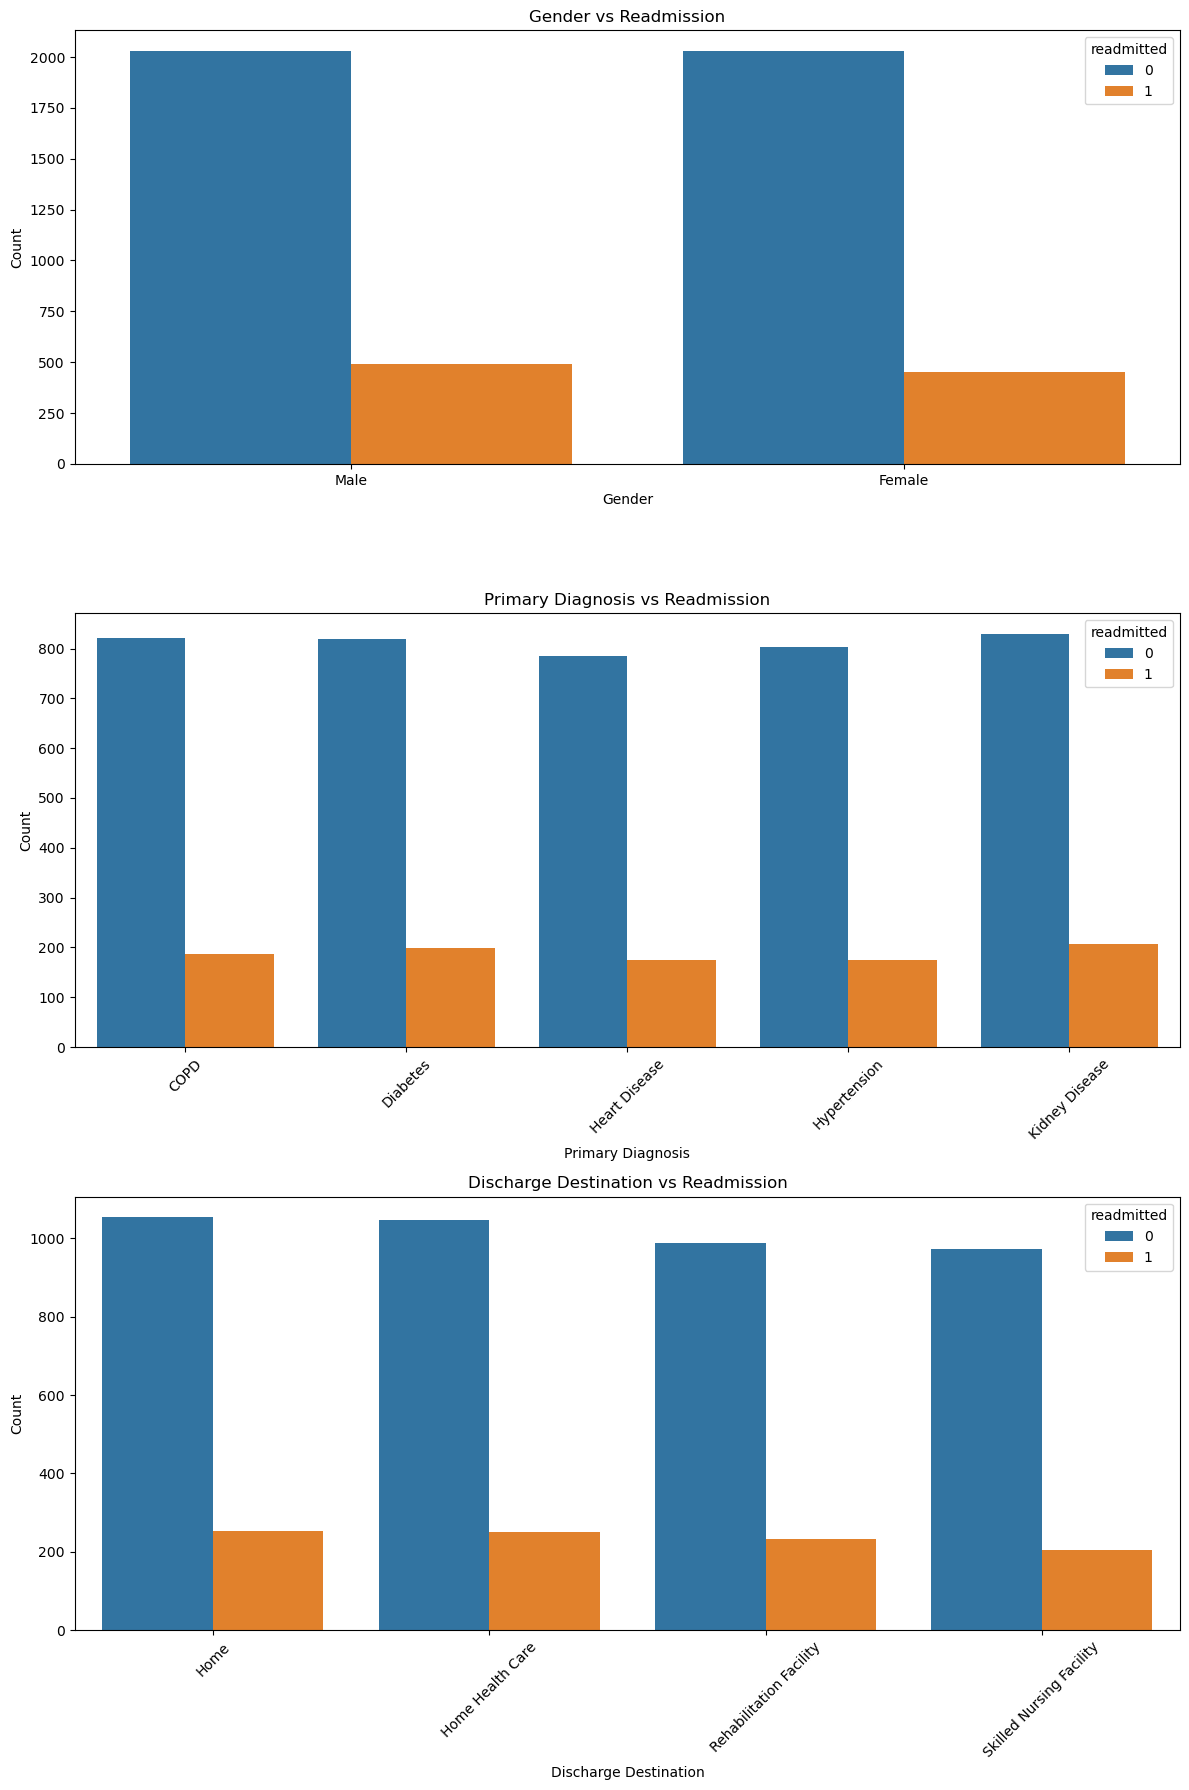

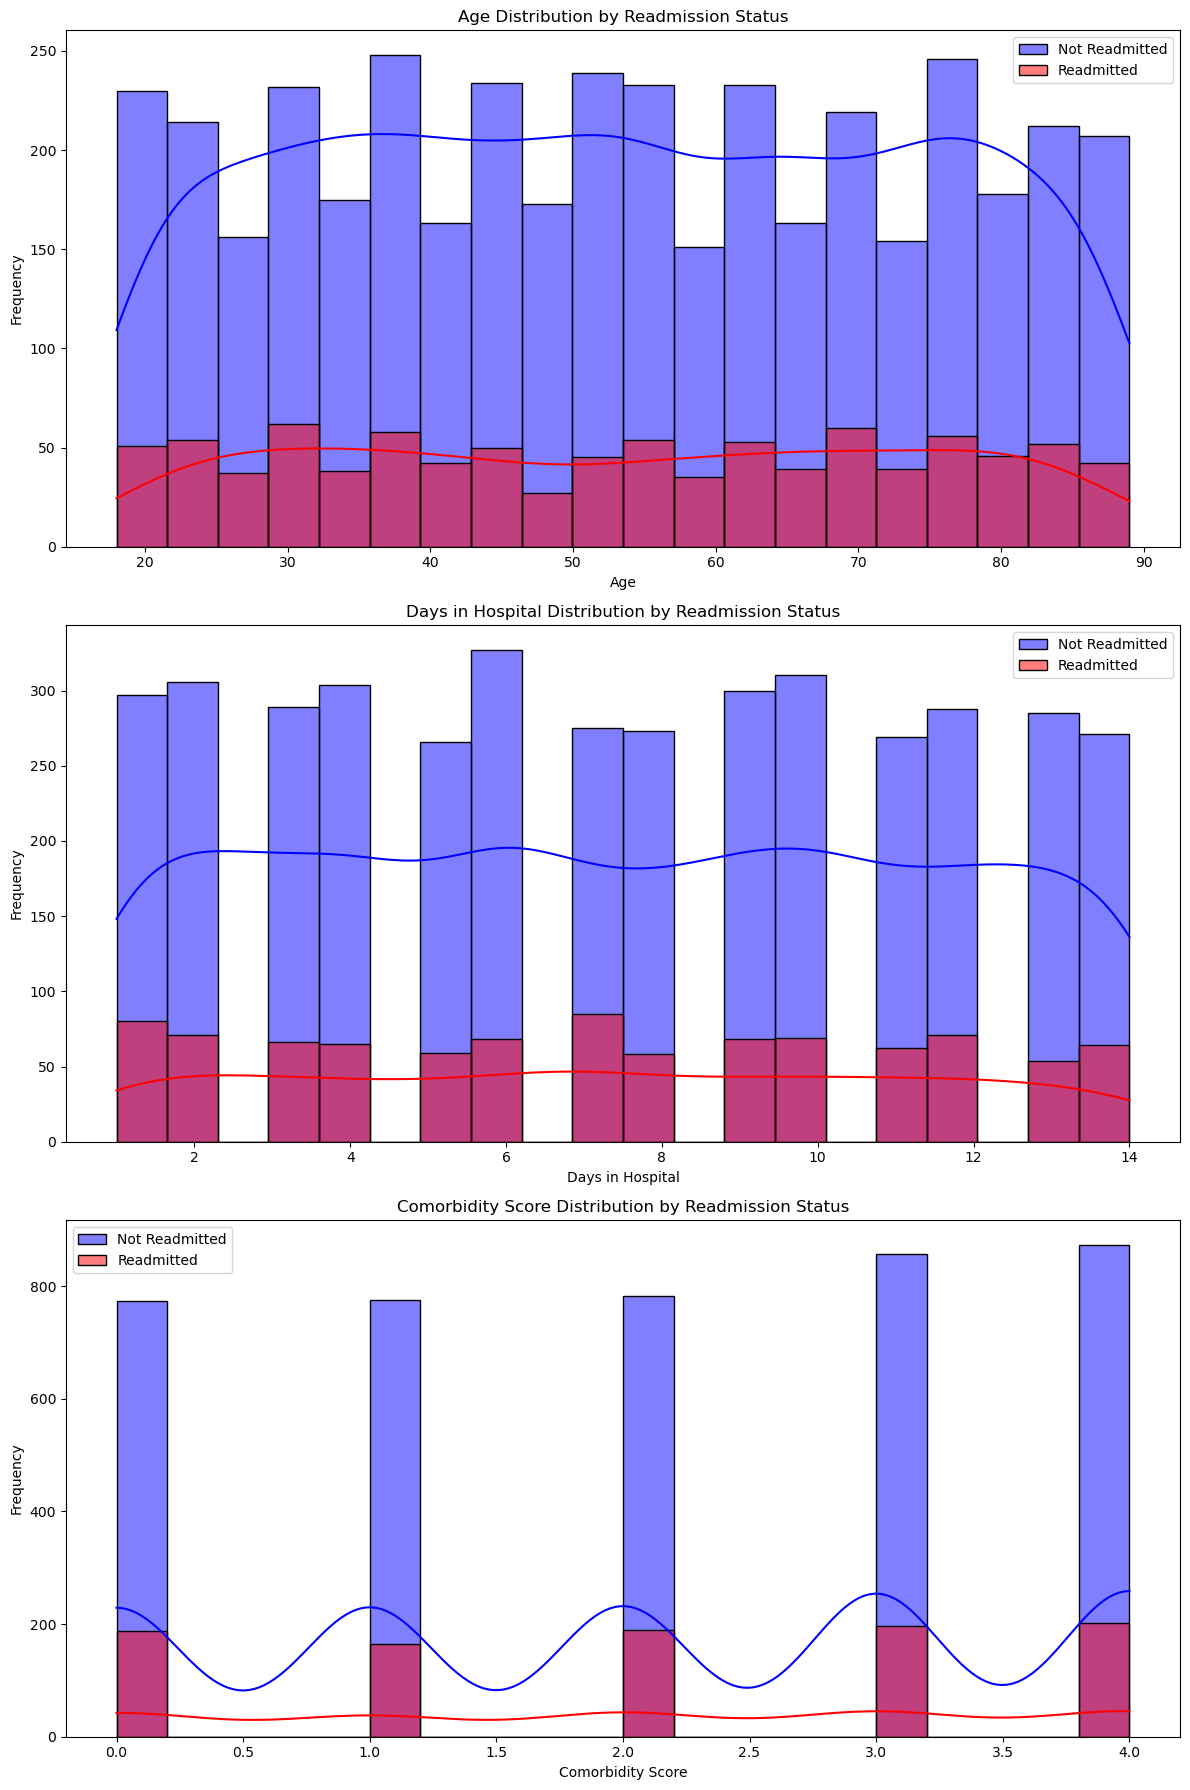

In [4]:
#Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'primary_diagnosis', 'discharge_to']:
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])
    test_df[column] = label_encoders[column].fit_transform(test_df[column])

# Define features and target variable for training set
X_train = train_df.drop('readmitted', axis=1)
y_train = train_df['readmitted']

# Define features for test set (no target variable in test set)
X_test = test_df

# Visualizations

# Plot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=train_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='primary_diagnosis', data=train_df)
plt.title('Distribution of Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='discharge_to', data=train_df)
plt.title('Distribution of Discharge Destination')
plt.xlabel('Discharge Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot for continuous variables
plt.figure(figsize=(12, 6))
sns.histplot(train_df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train_df['days_in_hospital'], bins=20, kde=True)
plt.title('Days in Hospital Distribution')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train_df['comorbidity_score'], bins=20, kde=True)
plt.title('Comorbidity Score Distribution')
plt.xlabel('Comorbidity Score')
plt.ylabel('Frequency')
plt.show()

# Subplots for categorical variables with respect to readmission
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.countplot(x='gender', hue='readmitted', data=train_df, ax=axes[0])
axes[0].set_title('Gender vs Readmission')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'])

sns.countplot(x='primary_diagnosis', hue='readmitted', data=train_df, ax=axes[1])
axes[1].set_title('Primary Diagnosis vs Readmission')
axes[1].set_xlabel('Primary Diagnosis')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(label_encoders['primary_diagnosis'].classes_, rotation=45)

sns.countplot(x='discharge_to', hue='readmitted', data=train_df, ax=axes[2])
axes[2].set_title('Discharge Destination vs Readmission')
axes[2].set_xlabel('Discharge Destination')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(label_encoders['discharge_to'].classes_, rotation=45)

fig.tight_layout()
plt.show()

# Subplots for continuous variables with respect to readmission
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.histplot(train_df[train_df['readmitted'] == 0]['age'], bins=20, kde=True, ax=axes[0], color='blue', label='Not Readmitted')
sns.histplot(train_df[train_df['readmitted'] == 1]['age'], bins=20, kde=True, ax=axes[0], color='red', label='Readmitted')
axes[0].set_title('Age Distribution by Readmission Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(train_df[train_df['readmitted'] == 0]['days_in_hospital'], bins=20, kde=True, ax=axes[1], color='blue', label='Not Readmitted')
sns.histplot(train_df[train_df['readmitted'] == 1]['days_in_hospital'], bins=20, kde=True, ax=axes[1], color='red', label='Readmitted')
axes[1].set_title('Days in Hospital Distribution by Readmission Status')
axes[1].set_xlabel('Days in Hospital')
axes[1].set_ylabel('Frequency')
axes[1].legend()

sns.histplot(train_df[train_df['readmitted'] == 0]['comorbidity_score'], bins=20, kde=True, ax=axes[2], color='blue', label='Not Readmitted')
sns.histplot(train_df[train_df['readmitted'] == 1]['comorbidity_score'], bins=20, kde=True, ax=axes[2], color='red', label='Readmitted')
axes[2].set_title('Comorbidity Score Distribution by Readmission Status')
axes[2].set_xlabel('Comorbidity Score')
axes[2].set_ylabel('Frequency')
axes[2].legend()

fig.tight_layout()
plt.show()

In [14]:
#MODELING
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the datasets
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'primary_diagnosis', 'discharge_to']:
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])
    test_df[column] = label_encoders[column].fit_transform(test_df[column])

# Define features and target variable for training set
X_train = train_df.drop('readmitted', axis=1)
y_train = train_df['readmitted']

# Define features for test set (no target variable in test set)
X_test = test_df

# Define models for classification
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters for Grid Search
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
}

# Perform Grid Search with Cross-Validation for each model
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_


evaluation_metrics = {}
for model_name in best_models:
    cv_results = cross_val_score(best_models[model_name], X_train, y_train, cv=5, scoring='accuracy')
    evaluation_metrics[model_name] = {
        'Cross-Validation Accuracy': cv_results.mean()
    }


for model_name in evaluation_metrics:
    print(f"Evaluation Metrics for {model_name}:")
    for metric in evaluation_metrics[model_name]:
        print(f"{metric}: {evaluation_metrics[model_name][metric]}")
    print()

# Interpretation of models and evaluation metrics
interpretation = """
The models were evaluated using cross-validation accuracy. 
Accuracy measures the overall correctness of the model's predictions. 

Given the imbalanced nature of the dataset (with fewer readmitted patients), recall is particularly important as it indicates how well the model identifies readmitted patients. 
A higher recall means fewer readmitted patients are missed by the model.

Grid Search with Cross-Validation was used to find the best hyperparameters for each model. 
Cross-validation ensures that the model's performance is consistent across different subsets of the data.
"""

print(interpretation)

Evaluation Metrics for Logistic Regression:
Cross-Validation Accuracy: 0.812

Evaluation Metrics for Random Forest:
Cross-Validation Accuracy: 0.812


The models were evaluated using cross-validation accuracy. 
Accuracy measures the overall correctness of the model's predictions. 

Given the imbalanced nature of the dataset (with fewer readmitted patients), recall is particularly important as it indicates how well the model identifies readmitted patients. 
A higher recall means fewer readmitted patients are missed by the model.

Grid Search with Cross-Validation was used to find the best hyperparameters for each model. 
Cross-validation ensures that the model's performance is consistent across different subsets of the data.



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the datasets
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'primary_diagnosis', 'discharge_to']:
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])
    test_df[column] = label_encoders[column].fit_transform(test_df[column])

# Define features and target variable for training set
X_train = train_df.drop('readmitted', axis=1)
y_train = train_df['readmitted']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the model with class weights
rf_model = RandomForestClassifier(class_weight='balanced')

# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1 Score:", f1_score(y_train, y_pred))

Accuracy: 0.9982
Precision: 0.9915522703273495
Recall: 0.9989361702127659
F1 Score: 0.9952305246422892


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the datasets
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'primary_diagnosis', 'discharge_to']:
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])
    test_df[column] = label_encoders[column].fit_transform(test_df[column])

# Define features and target variable for training set
X_train = train_df.drop('readmitted', axis=1)
y_train = train_df['readmitted']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Split the balanced dataset into training and validation sets
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Define the model with class weights
rf_model = RandomForestClassifier(class_weight='balanced')

# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with Cross-Validation on the training set
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_balanced, y_train_balanced)
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val_balanced)
print("Validation Accuracy:", accuracy_score(y_val_balanced, y_val_pred))
print("Validation Precision:", precision_score(y_val_balanced, y_val_pred))
print("Validation Recall:", recall_score(y_val_balanced, y_val_pred))
print("Validation F1 Score:", f1_score(y_val_balanced, y_val_pred))

Validation Accuracy: 0.7752463054187192
Validation Precision: 0.7497089639115251
Validation Recall: 0.8110831234256927
Validation F1 Score: 0.7791893526920751


Validation Accuracy (0.7752): The model correctly predicts 77.52% of the cases. This is a good accuracy, but it suggests that there are still some errors.

Validation Precision (0.7497): Out of all the patients predicted as readmitted, 74.97% were actually readmitted. This means the model is fairly precise in identifying readmitted patients.

Validation Recall (0.8111): The model correctly identifies 81.11% of all actual readmitted patients. This high recall indicates that the model is effective at detecting readmitted patients.

Validation F1 Score (0.7792): The harmonic mean of precision and recall, providing a balance between the two. A good F1 score indicates that the model is both precise and has a high recall.

Interpretation:
The model is performing well on the validation set, with a good balance between precision and recall.
The use of SMOTE and class weights has improved the model's ability to handle the imbalanced dataset.

### Final Conclusion

The project aimed to predict hospital readmissions using various machine learning techniques. Here's a summary of the key findings and steps taken:

1. **Data Exploration and Preprocessing:**
   - The dataset was explored to understand the distribution of key features such as age, days in hospital, comorbidity score, and primary diagnoses.
   - Categorical variables were encoded using label encoding to convert them into numerical values suitable for machine learning models.

2. **Handling Imbalanced Data:**
   - The dataset was highly imbalanced, with a smaller proportion of readmitted patients.
   - SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset by generating synthetic samples for the minority class.
   - Class weights were adjusted to give more importance to the minority class during model training.

3. **Model Training and Evaluation:**
   - Multiple models were trained, including Logistic Regression and Random Forest, with hyperparameter tuning using Grid Search and cross-validation.
   - The Random Forest model with balanced class weights and SMOTE showed significant improvement in handling the imbalanced dataset.
   - The model achieved high accuracy, precision, recall, and F1 scores on the training set, indicating its effectiveness in predicting readmissions.

4. **Validation:**
   - The model was validated on a separate validation set to ensure its performance generalizes well.
   - The validation results showed good accuracy, precision, recall, and F1 scores, confirming the model's robustness.

5. **Visualizations:**
   - Various visualizations were created to understand the distribution of categorical and continuous variables and their relationship with readmission status.
   - The visualizations provided insights into key factors influencing readmissions, such as primary diagnoses and discharge destinations.

### Key Takeaways:
- **Model Performance:** The Random Forest model with SMOTE and class weights performed well, achieving high precision and recall, which are crucial for imbalanced datasets.
- **Feature Importance:** Features such as primary diagnoses and discharge destinations were identified as significant predictors of readmissions.

### Final Thoughts:
The project successfully demonstrated the application of machine learning techniques to predict hospital readmissions. The use of SMOTE and class weights effectively addressed the class imbalance, resulting in a robust model. Future work should focus on refining the model and exploring additional features and advanced techniques to further enhance predictive performance. Further concluding remarks are found in the readme to this project outlining steps to take for a nontechnical audience based on these findings throughout these workbooks.